Import required Packages

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

Defining The Dedicated Folders

In [2]:
# Define the paths to the directory containing original images and output folders
input_folder = r'E:\Drone Dataset\dataset\semantic_drone_dataset\original_images'
output_folder_resize = r'E:\Drone Dataset\dataset\semantic_drone_dataset\ResizedTestCases'
output_folder_color = r'E:\Drone Dataset\dataset\semantic_drone_dataset\ColorTransformedTestCases'
output_folder_normalize = r'E:\Drone Dataset\dataset\semantic_drone_dataset\NormalizedTestCases'
output_folder_filter = r'E:\Drone Dataset\dataset\semantic_drone_dataset\FilteredTestCases'

Creating folder if it doesn't exist

In [3]:
# Create output folders if they don't exist
for folder in [output_folder_resize, output_folder_color, output_folder_normalize, output_folder_filter]:
    if not os.path.exists(folder):
        os.makedirs(folder)


Getting the Images from the folder

In [4]:
image_files = [f for f in os.listdir(input_folder) if f.endswith('.jpg')]
# Specify the desired size for the resized images
target_size = (200, 200)

For Loop For Image Processing

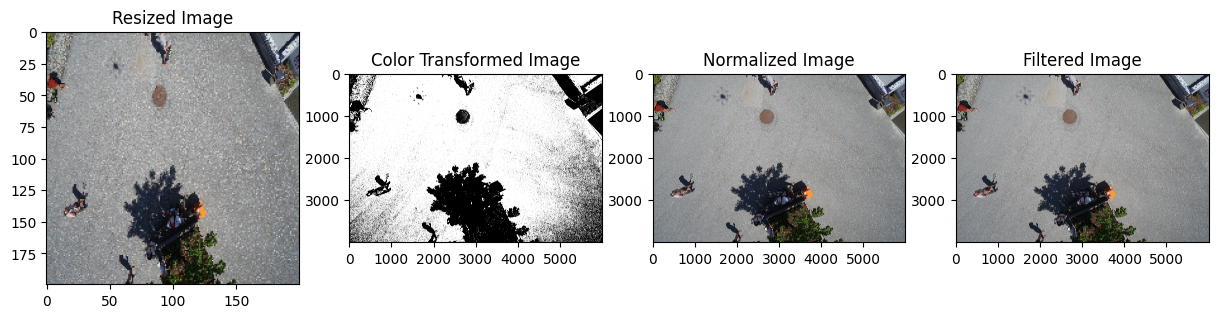

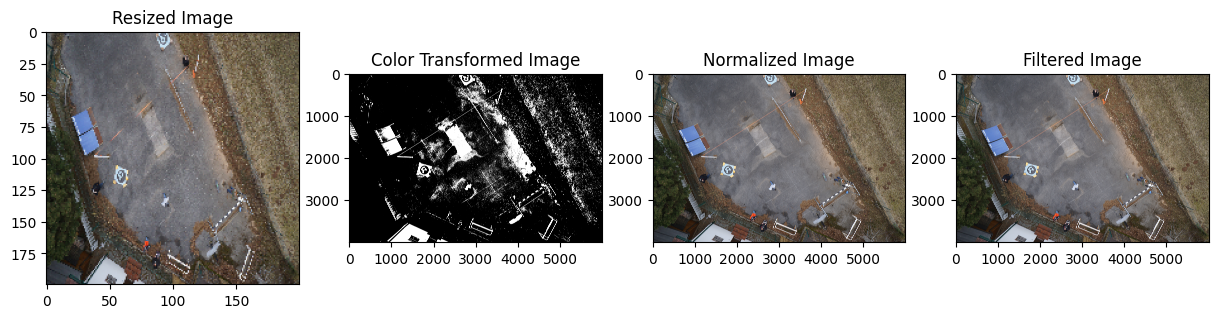

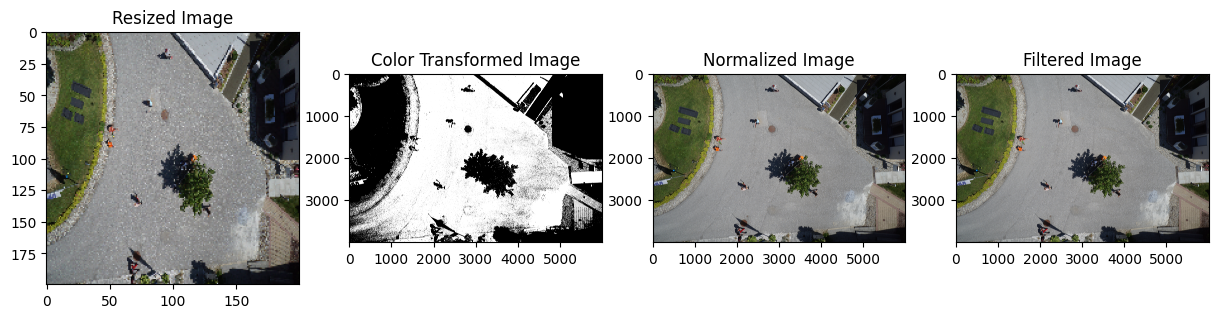

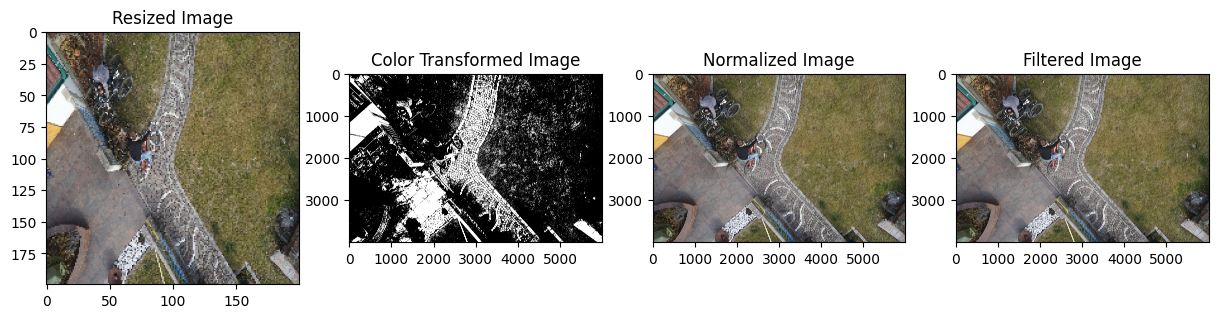

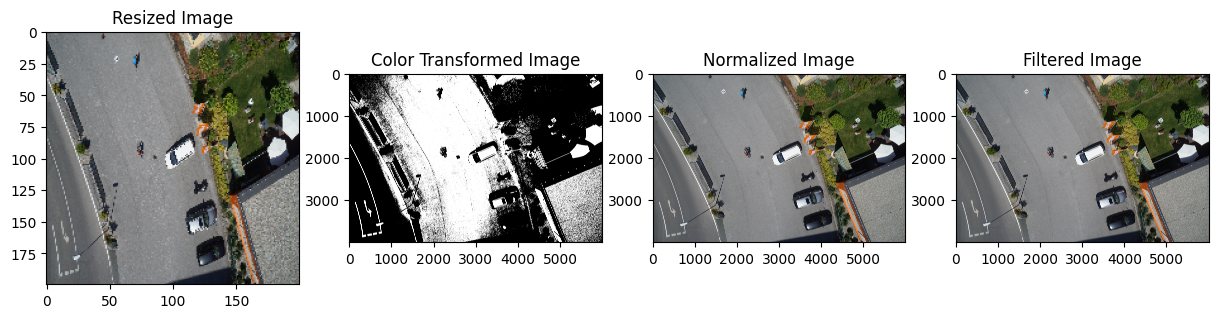

In [5]:
# Loop through each image file, process it, and save it into the output folders
for image_file in image_files:
    # Get the file path
    input_file_path = os.path.join(input_folder, image_file)
    # Read the original image
    original_image = cv2.imread(input_file_path)
    # Resize the image
    resized_image = cv2.resize(original_image, target_size)
    output_file_path_resize = os.path.join(output_folder_resize, image_file.replace('.jpg', '_resized.png'))
    cv2.imwrite(output_file_path_resize, resized_image)
    # Color transform (e.g., grayscale conversion)
    gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
    _, color_transformed_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)
    output_file_path_color = os.path.join(output_folder_color, image_file.replace('.jpg', '_color.png'))
    cv2.imwrite(output_file_path_color, color_transformed_image)
    # Normalize the image
    normalized_image = cv2.normalize(original_image, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    output_file_path_normalize = os.path.join(output_folder_normalize, image_file.replace('.jpg', '_normalize.png'))
    cv2.imwrite(output_file_path_normalize, normalized_image)
    # Apply a filter (e.g., Gaussian filter)
    filtered_image = cv2.GaussianBlur(original_image, (5, 5), 2)  # Sigma = 2
    output_file_path_filter = os.path.join(output_folder_filter, image_file.replace('.jpg', '_filter.png'))
    cv2.imwrite(output_file_path_filter, filtered_image)
     # Plotting sample images
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 4, 1)
    plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
    plt.title('Resized Image')
    plt.axis('on')
    plt.subplot(1, 4, 2)
    plt.imshow(color_transformed_image, cmap='gray')
    plt.title('Color Transformed Image')
    plt.axis('on')
    plt.subplot(1, 4, 3)
    plt.imshow(cv2.cvtColor(normalized_image.astype('uint8'), cv2.COLOR_BGR2RGB))
    plt.title('Normalized Image')
    plt.axis('on')
    plt.subplot(1, 4, 4)
    plt.imshow(cv2.cvtColor(filtered_image, cv2.COLOR_BGR2RGB))
    plt.title('Filtered Image')
    plt.axis('on')
    plt.show()
